In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model

In [60]:
# Inputs tensor of size 8
inputs = keras.Input(shape=(8,), name='image')

In [61]:
# Add a Dense layer with 12 nodes
x = layers.Dense(12, activation='relu')(inputs)

In [62]:
# Add one more layer having 8 nodes
x = layers.Dense(8, activation='relu')(x)

In [63]:
# add the output layer to our network
outputs = layers.Dense(5)(x)

The model can now be defined by using these inputs and outputs as shown in the following statement:

In [64]:
model = Model(inputs=inputs, outputs=outputs, name='multilayer model')

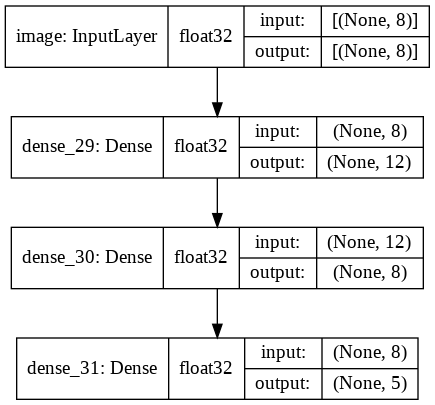

In [65]:
keras.utils.plot_model(model, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

---

**Model Subclassing**

In [36]:
class MyModel(tf.keras.Model):
  def __init__(self, use_dp = False, num_output = 1):
    super(MyModel, self).__init__()
    self.use_dp = use_dp
    self.dense1 = tf.keras.layers.Dense(12, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(24, activation=tf.nn.relu)
    self.dense3 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense4 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
    if self.use_dp:
      use_dp = tf.keras.layers.Dropout(0.3)

  def call(self, x):
    x = self.dense1(x)
    x = self.dense2(x)
    if self.use_dp:
      x = self.dp(x)
    x = self.dense3(x)
    if self.use_dp:
      x = self.dp(x)
    return self.dense4(x)

In [39]:
model = MyModel()

In [42]:
model.compile(loss = tf.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

---

**Custom Layers**

In [50]:
class MyLayer(tf.keras.layers.Layer):
  def __init__(self, output_dim, **kwargs):
    self.output_dim = output_dim
    super(MyLayer, self).__init__( **kwargs)

  def build(self, input_shape):
    self.W = self.add_weight(name = 'kernel', 
                             shape = (input_shape[1], self.output_dim), 
                             initializer = 'uniform', 
                             trainable = True)
    self.built = True

  def call(self, x):
    return tf.matmul(x, self.W)

  def compute_output_shape(self, input_shape):
    return (input_shape[0], self.output_dim)


Now use this custom layer in any network configuration:

In [51]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(256, input_shape=(784,)),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                            #  tf.keras.layers.Dense(10),
                              MyLayer(10),
                             tf.keras.layers.Dense(10, activation = 'softmax')]
                            )

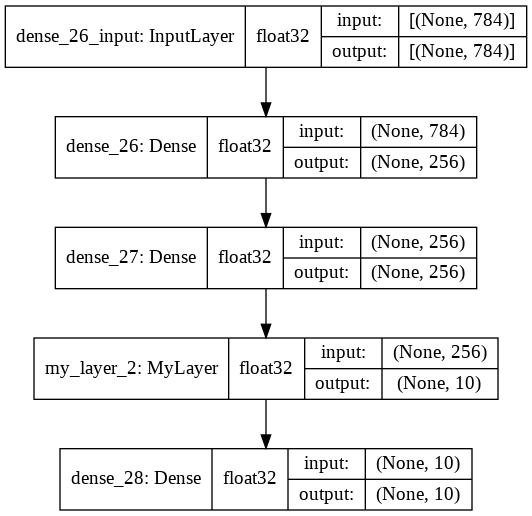

In [52]:
keras.utils.plot_model(model, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [53]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [55]:
# model.fit(x,y1, batch_size=32, epochs=30)

---

**Saving Models**

Whole-Model Saving: 
<br>
When you save the whole model, the following information will be saved.


*   The model’s architecture
*   Weights
*   Training configuration that you passed to its compile method
*   The optimizer and its state
<br>

To save the model you would use the following code:

In [ ]:
model.save('filename.h5')

To recreate the model, you would use the following code:

In [57]:
new_model = keras.models.load_model('filename.h5')

**Saving Architecture**
<br>
In some situations, you may be interested in saving the model’s architecture and not its weight values or the optimizer state. In such requirements, you call the get_config method to retrieve the model’s configuration and use it later to recreate the model on the saved instance.
<br>

**Note**: When you recreate the model as shown in this statement, you
will lose all the previously learned information.

In [ ]:
# Retrieve and save model configuration
config = model.get_config()
#Recreate model
model = keras.Model.from_config(config)

**Saving Weights**
<br>
In some situations, you may be interested in saving model’s training state and not its architecture. In this situation, you would use get_weights and set_weights method to save and retrieve the weights alone.

In [58]:
# Retrieving model's state
weights = model.get_weights()
# Restoring state
model.set_weights(weights)

**Saving to JSON**

In [68]:
from keras.models import model_from_json

# serialize to JSON
json_model = model.to_json()
with open("model_1.json", "w") as json_file:
  json_file.write(json_model)

# load json and re-create model
from keras.models import model_from_json

file = open('model_1.json', 'r')
buffer = file.read()
file.close()
model = tf.keras.models.model_from_json(buffer)

In [70]:
model_1 = tf.keras.Sequential([
                               layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same',input_shape = (32, 32, 3)),
                               layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
                               layers.MaxPooling2D((2, 2)),
                               layers.Dense(128, activation = 'relu'),
                               layers.Dense(10, activation = 'softmax')
])

In [71]:
from keras.models import model_from_json

# serialize to JSON
json_model = model.to_json()
with open("model_1.json", "w") as json_file:
  json_file.write(json_model)


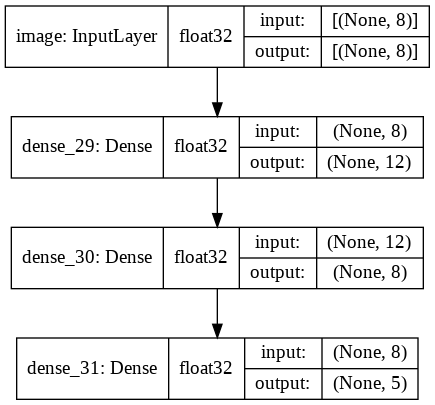

In [73]:
# load json and re-create model
from keras.models import model_from_json

file = open('model_1.json', 'r')
buffer = file.read()
file.close()
model = tf.keras.models.model_from_json(buffer)
keras.utils.plot_model(model, 'multilayer_model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

---